In [168]:
import os
import json
import matplotlib.pyplot as plt
import shutil
import random
from collections import defaultdict

In [169]:
file_path = r'C:\Users\asus\Desktop\SENCE\2. Semester\Projektarbeit 2\29.08.24\VorläufigFIN\notes.json'

In [170]:
# Öffnen und Laden der JSON-Datei in die Variable `notes`
with open(file_path, 'r') as json_file:
    notes = json.load(json_file)  # Hier wird die JSON-Datei geladen und in die Variable `notes` gespeichert

In [171]:
# Jetzt können Sie die Daten verarbeiten
category_map = {category['id']: category['name'] for category in notes['categories']}

In [172]:
# Initialisiere Dictionarys zum Speichern der Ergebnisse
category_counts = {category['name']: 0 for category in notes['categories']}
image_categories = {}

In [173]:
# Schritt 2: Durchlaufen aller Textdateien
text_files_dir = r'C:\Users\asus\Desktop\SENCE\2. Semester\Projektarbeit 2\29.08.24\VorläufigFIN\labels'
for filename in os.listdir(text_files_dir):
    if filename.endswith('.txt'):
        with open(os.path.join(text_files_dir, filename), 'r') as f:
            lines = f.readlines()
            categories_in_image = []
            for line in lines:
                category_id = int(line.split()[0])
                category_name = category_map.get(category_id, 'Unknown')
                categories_in_image.append(category_name)
                category_counts[category_name] += 1
            image_categories[filename] = categories_in_image


In [175]:
# Schritt 3: Ausgabe der Ergebnisse
print("Anzahl der Kategorien:")
for category, count in category_counts.items():
    print(f"{category}: {count}")

Anzahl der Kategorien:
car: 2129
entrances in houses: 143
marked parking space: 642
marked parking space road: 428
moving cars: 200
parked roadside: 712
unparked roadside: 327


In [176]:
print("\nKategorien pro Bild:")
for image, categories in image_categories.items():
    print(f"{image}: {categories}")



Kategorien pro Bild:
008466da-511648_5403604_Base_A62_Luftbild_2021_EPSG25832.txt: []
0090b3ce-512816_5401562_Base_A62_Luftbild_2021_EPSG25832.txt: ['unparked roadside', 'parked roadside', 'parked roadside', 'unparked roadside', 'unparked roadside', 'unparked roadside', 'car', 'car', 'car', 'car', 'car', 'parked roadside', 'parked roadside', 'parked roadside', 'parked roadside']
0097a5a1-511600_5403872_Base_A62_Luftbild_2021_EPSG25832.txt: []
00a438c1-511745_5401489_Base_A62_Luftbild_2021_EPSG25832.txt: ['car', 'car', 'car', 'unparked roadside', 'parked roadside', 'parked roadside', 'parked roadside']
00e0c856-511745_5403361_Base_A62_Luftbild_2021_EPSG25832.txt: ['parked roadside', 'parked roadside']
026433b0-513618_5401245_Base_A62_Luftbild_2021_EPSG25832.txt: ['unparked roadside', 'parked roadside', 'parked roadside', 'car', 'car', 'unparked roadside', 'unparked roadside']
02d2f97a-511721_5403823_Base_A62_Luftbild_2021_EPSG25832.txt: ['car', 'car', 'parked roadside', 'parked roadsid

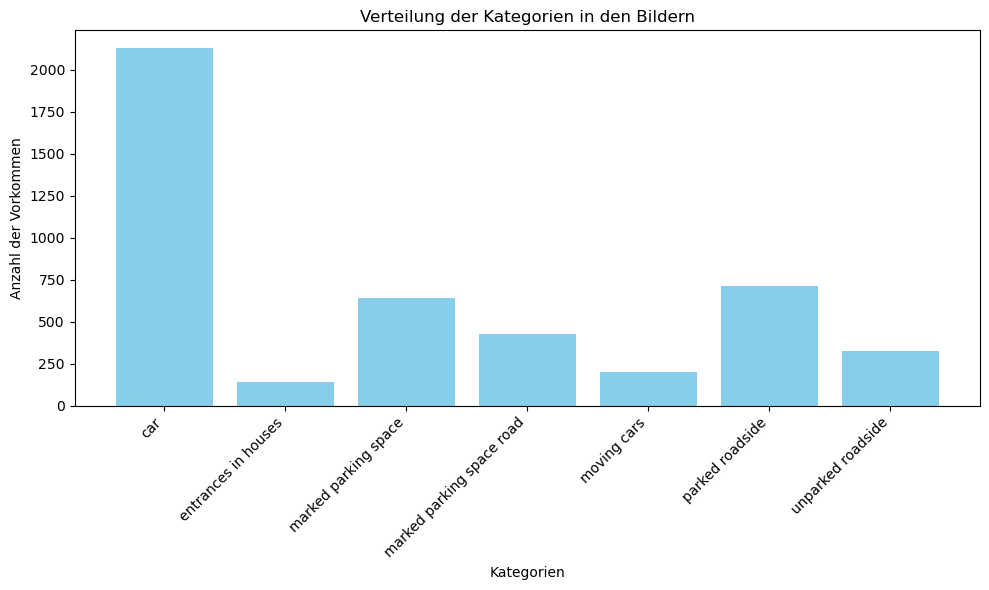

In [177]:
# Schritt 3: Erstellen eines Balkendiagramms
categories = list(category_counts.keys())
counts = list(category_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color='skyblue')
plt.xlabel('Kategorien')
plt.ylabel('Anzahl der Vorkommen')
plt.title('Verteilung der Kategorien in den Bildern')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [178]:
import os
import shutil
import random
from collections import defaultdict

# Pfade und Verzeichnisse festlegen
input_dir = r'C:\Users\asus\Desktop\SENCE\2. Semester\Projektarbeit 2\29.08.24\VorläufigFIN\images'  # Ordner mit den Bildern und Textdateien
output_dir = r'C:\Users\asus\Desktop\SENCE\2. Semester\Projektarbeit 2\29.08.24\VorläufigFIN\data'  # Ordner, in dem Train, Test, Val erstellt werden

# Pfade für Train, Test, Val
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')
val_dir = os.path.join(output_dir, 'val')

# Kategorien aus JSON-Daten
categories = {
    0: "car",
    1: "entrances in houses",
    2: "marked parking space",
    3: "marked parking space road",
    4: "moving cars",
    5: "parked roadside",
    6: "unparked roadside"
}

# Erstellen Sie die Ausgabeordner, wenn sie nicht existieren
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Alle Bilddateien sammeln
files = [f for f in os.listdir(input_dir) if f.endswith('.jpg') or f.endswith('.png')]

# Überprüfung, ob für jedes Bild eine zugehörige Textdatei existiert
unmatched_files = []
for file in files:
    text_file = os.path.splitext(file)[0] + '.txt'
    if not os.path.exists(os.path.join(input_dir, text_file)):
        unmatched_files.append(file)

if unmatched_files:
    print(f"Unmatched files (no corresponding .txt found): {len(unmatched_files)}")
    print(unmatched_files)

# Zufälliges Mischen der Dateien
random.shuffle(files)

# Aufteilen der Dateien nach 70% Train, 15% Test, 15% Val
n = len(files)
train_split = int(n * 0.70)
test_split = int(n * 0.15)
val_split = n - train_split - test_split

train_files = files[:train_split]
test_files = files[train_split:train_split + test_split]
val_files = files[train_split + test_split:]

# Funktion zum Verschieben der Dateien
def move_files(file_list, target_dir):
    for file in file_list:
        src_path = os.path.join(input_dir, file)
        dst_path = os.path.join(target_dir, file)
        if os.path.exists(src_path):
            shutil.move(src_path, dst_path)
            text_file = os.path.splitext(file)[0] + '.txt'
            src_text_path = os.path.join(input_dir, text_file)
            dst_text_path = os.path.join(target_dir, text_file)
            if os.path.exists(src_text_path):
                shutil.move(src_text_path, dst_text_path)

# Dateien verschieben
move_files(val_files, val_dir)
move_files(train_files, train_dir)
move_files(test_files, test_dir)

# Überprüfung der Anzahl der Dateien in jedem Ordner
print(f"Training files: {len(os.listdir(train_dir))}")
print(f"Testing files: {len(os.listdir(test_dir))}")
print(f"Validation files: {len(os.listdir(val_dir))}")

# Kategorieanalyse im Val-Ordner
category_count = defaultdict(int)

for file in os.listdir(val_dir):
    if file.endswith('.jpg') or file.endswith('.png'):
        text_file = os.path.splitext(file)[0] + '.txt'
        text_file_path = os.path.join(val_dir, text_file)
        if os.path.exists(text_file_path):
            with open(text_file_path, 'r') as f:
                content = f.read().strip()
                for line in content.splitlines():
                    category_id = int(line.split()[0])  # Annahme: Kategorie-ID ist die erste Zahl in der Zeile
                    category_name = categories.get(category_id, None)
                    if category_name:
                        category_count[category_name] += 1

# Gesamtzahl der Dateien im Val-Ordner
total_val_files = sum(category_count.values())

# Anzeige der Verteilung in Val inklusive Prozentzahlen
print("\nVerteilung der Kategorien im Val-Ordner:")
for category, count in category_count.items():
    percentage = (count / total_val_files) * 100
    print(f"Kategorie: {category}, Anzahl: {count}, Anteil: {percentage:.2f}%")

# Überprüfung der Verteilung in Val
print("\nVerteilung der Kategorien im Val-Ordner:")
for category, count in category_count.items():
    print(f"Kategorie: {category}, Anzahl: {count}")

# Überprüfung verbleibender Dateien im input_dir
remaining_files_in_input_dir = os.listdir(input_dir)
if remaining_files_in_input_dir:
    print(f"\nEs verbleiben {len(remaining_files_in_input_dir)} Dateien im Ursprungsordner:")
    print(remaining_files_in_input_dir)
else:
    print("\nAlle Dateien wurden erfolgreich verschoben.")

Training files: 1422
Testing files: 304
Validation files: 308

Verteilung der Kategorien im Val-Ordner:
Kategorie: moving cars, Anzahl: 39, Anteil: 5.56%
Kategorie: marked parking space, Anzahl: 101, Anteil: 14.41%
Kategorie: car, Anzahl: 329, Anteil: 46.93%
Kategorie: marked parking space road, Anzahl: 69, Anteil: 9.84%
Kategorie: entrances in houses, Anzahl: 23, Anteil: 3.28%
Kategorie: parked roadside, Anzahl: 91, Anteil: 12.98%
Kategorie: unparked roadside, Anzahl: 49, Anteil: 6.99%

Verteilung der Kategorien im Val-Ordner:
Kategorie: moving cars, Anzahl: 39
Kategorie: marked parking space, Anzahl: 101
Kategorie: car, Anzahl: 329
Kategorie: marked parking space road, Anzahl: 69
Kategorie: entrances in houses, Anzahl: 23
Kategorie: parked roadside, Anzahl: 91
Kategorie: unparked roadside, Anzahl: 49

Alle Dateien wurden erfolgreich verschoben.
